# SVM Digits from MNIST with Scikit-Learn

### On commence par importer les bibliothèques utilisées par notre notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

### On ouvre les csv avec pandas

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test =  pd.read_csv("data/test.csv")
df_sample_submission =  pd.read_csv("data/sample_submission.csv")

### On regarde les infos des différents datasets

Ici nous avons 3 datasets :
- train.csv : contient les données d'entrainement avec les champs suivants :
  - 'label' : le chiffre correspondant à l'observation
  - 'pixel0' -> 'pixel783' : l'information de coloration de chaque pixel de l'image à analyser, entre 0 et 255.
- test.csv : les données de test qu'il va falloir trouver. Ce dataset ne contient pas, de base, le champs label.
- sample_submission.csv : un exemple de csv pour la soumission sur Kaggle du résultat.

On peut voir que les images, qui sont de taille 28x28, ont étées _applaties_ pour rentrer dans une ligne, ainsi les différentes lignes de l'images sont placées les unes à la suite des autres pour former ces 784 colonnes. 

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Au niveau des types de données, le jeu de donnée d'entrainement est essentiellement composé d'entiers int64, tout comme le jeu de test.

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [5]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


On va tester s'il y a des valeurs nulles.

In [6]:
for i in df_train.columns:
    if df_train[i].isna().sum():
        print(i)

Aucune valeur nulle dans le jeu d'entrainement.

In [7]:
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Ici on ne supprime pas les colonnes

In [9]:
# df_train.drop(df_train.loc[:, np.mean(df_train, axis=0) == 0.0], axis=1, inplace=True)

In [10]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


On compte le nombre de labels différents

In [11]:
df_train.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

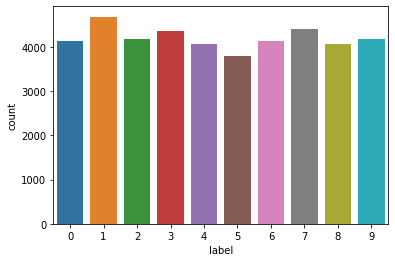

In [12]:
sns.countplot(x='label', data=df_train)

### Construction du modèle

In [13]:
X = df_train.drop('label', axis=1)
y = df_train['label']

On va utiliser un standard scaler pour normaliser les données

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

On split le jeu d'entrainement.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

On commence par utiliser un classifier sans paramètre, non optimisé.

In [16]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Support Vector Machine")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix\n", conf_matrix)

Support Vector Machine
Accuracy: 0.9178095238095239
Confusion Matrix
 [[1007    0    8    1    1    7   12    0    4    1]
 [   0 1129    4    7    2    3    0    1    8    0]
 [   6   13  931   24   13    4    3   10   15    1]
 [   6    6   21  979    2   32    0    6   17    5]
 [   3    4   11    0  948    3    2    6    1   26]
 [   6    4    9   55    5  852    7    3   23   11]
 [  12    0   23    2    5   11  976    0    4    0]
 [   2    6   22    7    9    1    1  998    7   28]
 [   5   34   21   55   10   37    6    2  880    6]
 [   4    1    8   18   44    4    0   36   10  937]]


Le score est bon sur le jeu d'entrainement, on va voir sur le jeu de test.

On fait attention à dropper les colonnes qui ne sont pas nécessaires, comme on l'a vu précédemment car elles avaient une moyenne à 0.

In [18]:
df_test = scaler.fit_transform(df_test)
ypred_test = svm_classifier.predict(df_test)

In [ ]:
df_sample_submission.loc[:, 'Label'] = [int(x) for x in ypred_test]
df_sample_submission.to_csv('submission_jean7.csv', index=False)

![Score sans optimisation](submission_results/score_jean_05.png)

On peut voir que le résultat est très bon, y-a-t'il besoin de continuer ?